# CH.03 - 3.6.2.2

In [3]:
from util.VisualizeDataset import VisualizeDataset
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams["figure.figsize"] = [15,10]

In [4]:
rawdatapth = "data/result-given/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

In [15]:
dataset = pd.read_csv(rawdatapth + "chapter2_result.csv", index_col=0, nrows=10000)
dataset.index = pd.to_datetime(dataset.index)
dataset

,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,0.001667,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.041
2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,0.002333,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.132
2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,0.001824,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.282
2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,0.001956,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.369
2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,0.001896,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-08 19:10:04.406222395,-1.109471,-11.582451,0.009098,5.644682,-5.408523,-1.288909,0.025118,0.415373,-0.140627,0.255886,...,0,0,0.0,6.280800,51.868800,-5.304000,-24.458333,47.000000,-0.583333,1027.162
2016-02-08 19:10:04.656222395,1.229520,-10.174580,-2.400820,6.878048,-8.971071,-2.271476,1.680800,-0.157720,1.258660,-0.239048,...,0,0,0.0,6.544800,49.776000,-10.171200,-19.120000,50.200000,0.600000,1027.893
2016-02-08 19:10:04.906222395,-1.413440,-9.773780,1.805340,4.834951,-5.434000,-3.632756,-0.482500,-0.477660,0.064360,-0.300976,...,0,0,NaN,15.811200,42.098400,-25.629600,-18.000000,49.800000,5.100000,NaN
2016-02-08 19:10:05.156222395,0.781360,-9.936880,-2.036180,5.740911,-8.554556,-4.224333,-0.748040,0.312520,-0.786100,0.027956,...,0,0,0.0,14.680800,44.287200,-21.201600,-22.318182,48.090909,5.727273,1030.780


In [12]:
outliercols = ["acc_phone_x", "light_phone_lux"]

OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()

In [13]:
DataViz = VisualizeDataset()

## Chauvenet

2
Figure saved to figures/figure_1.png


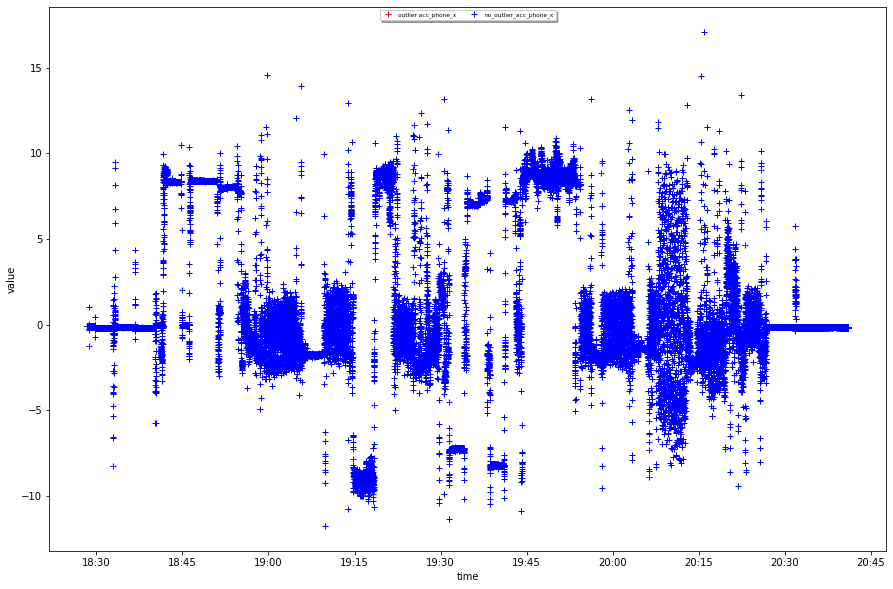

4
Figure saved to figures/figure_2.png


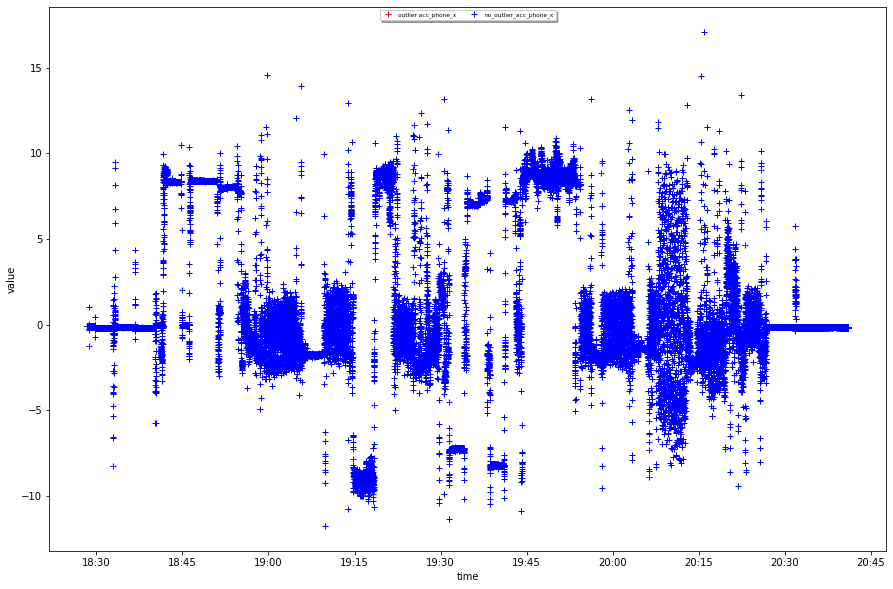

6
Figure saved to figures/figure_3.png


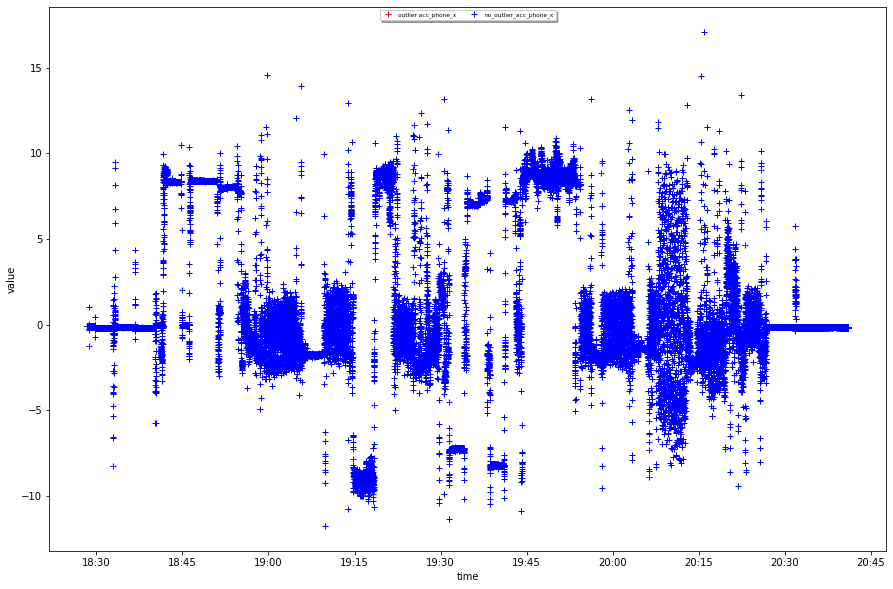

8
Figure saved to figures/figure_4.png


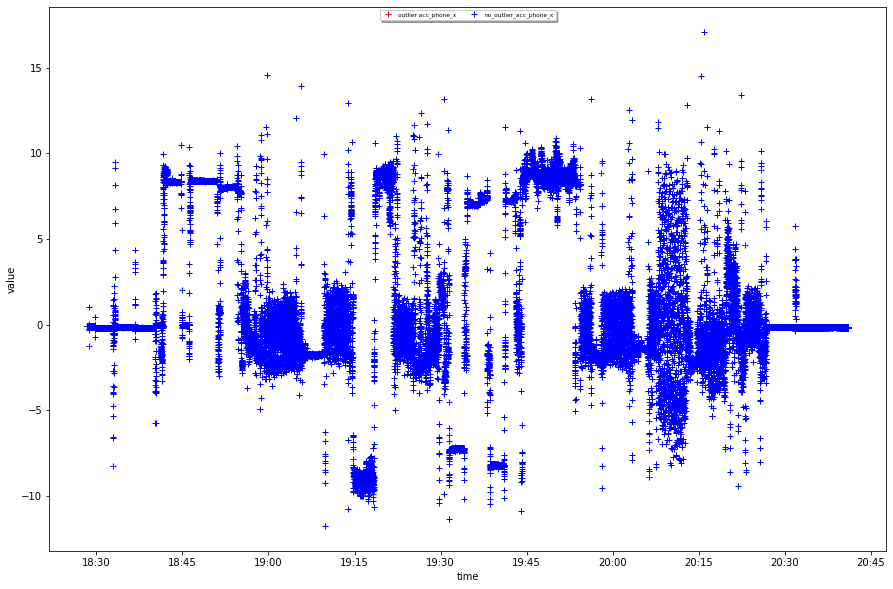

10
Figure saved to figures/figure_5.png


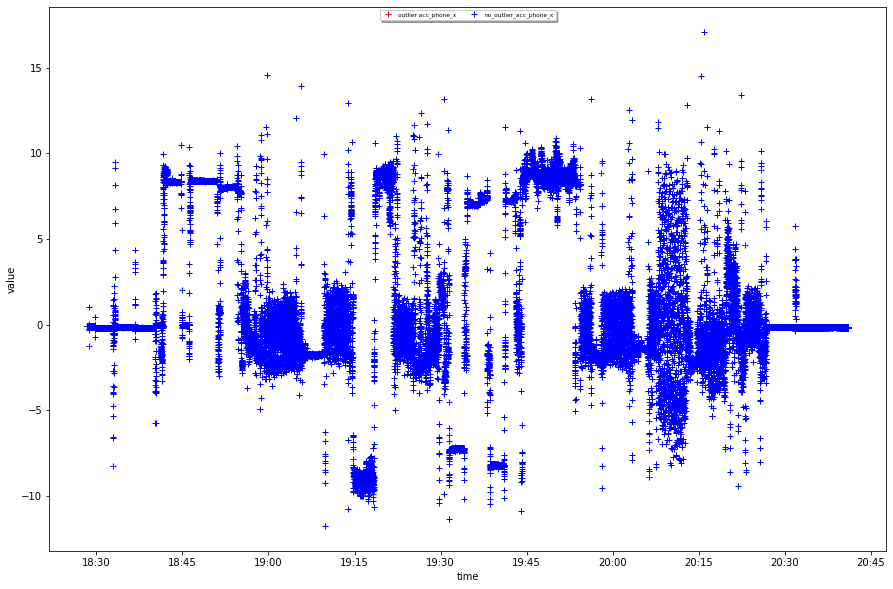

100
Figure saved to figures/figure_6.png


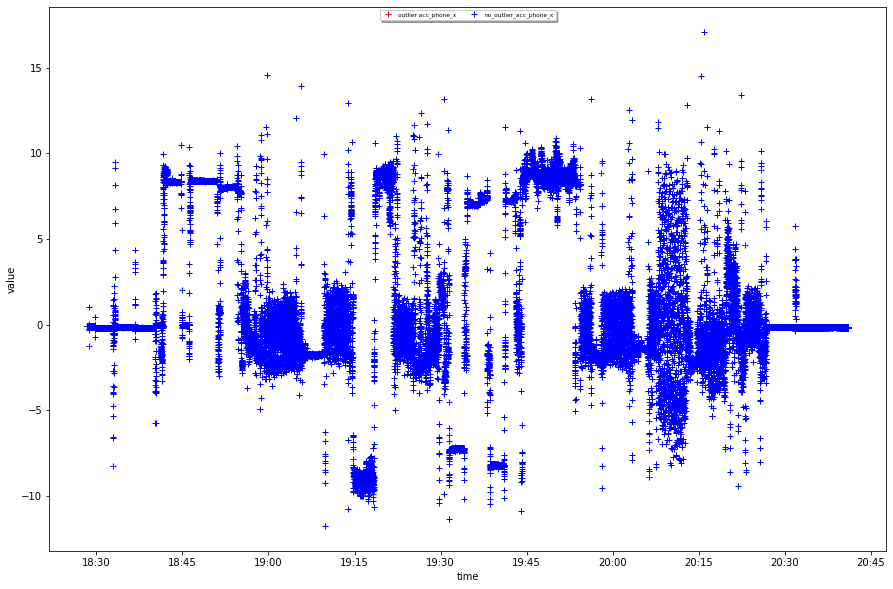

2
Figure saved to figures/figure_7.png


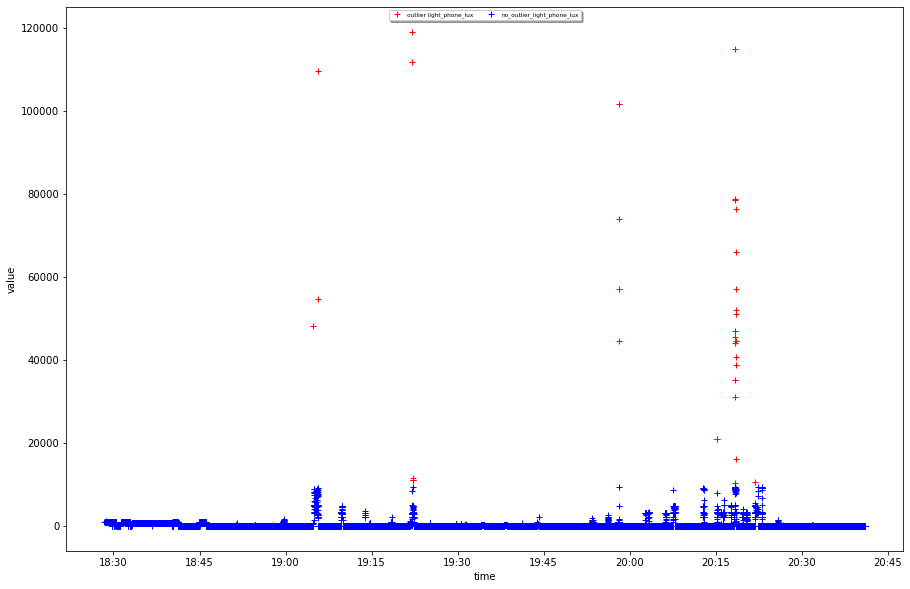

4
Figure saved to figures/figure_8.png


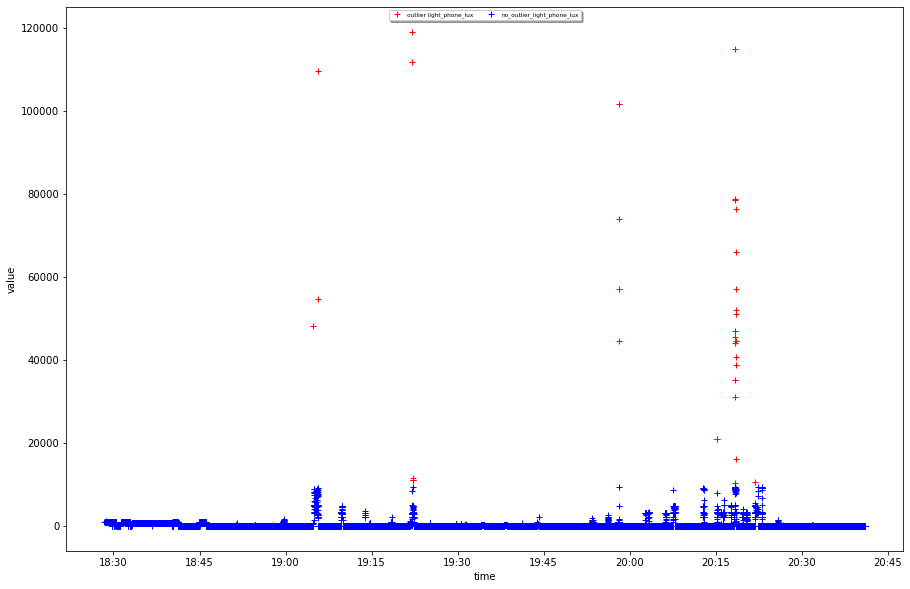

6
Figure saved to figures/figure_9.png


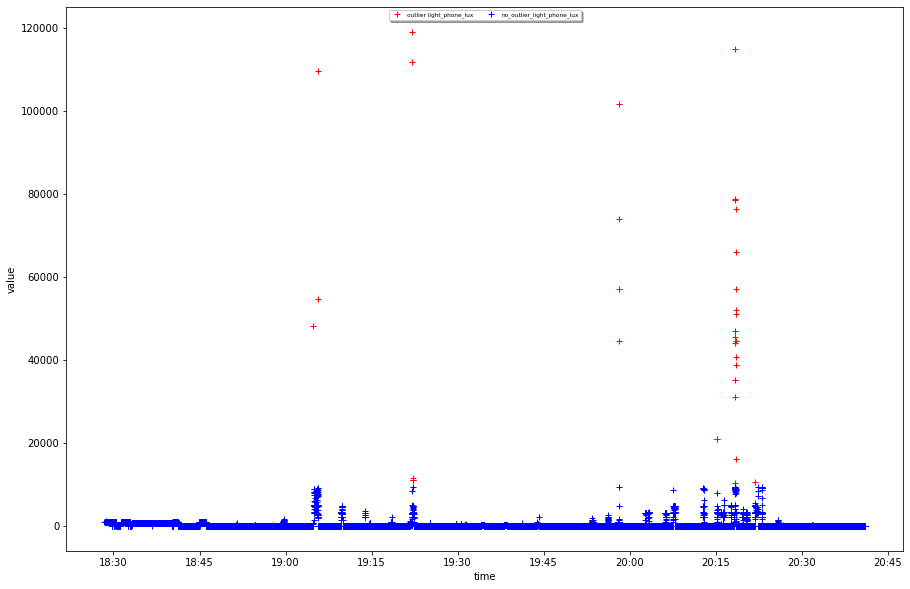

8
Figure saved to figures/figure_10.png


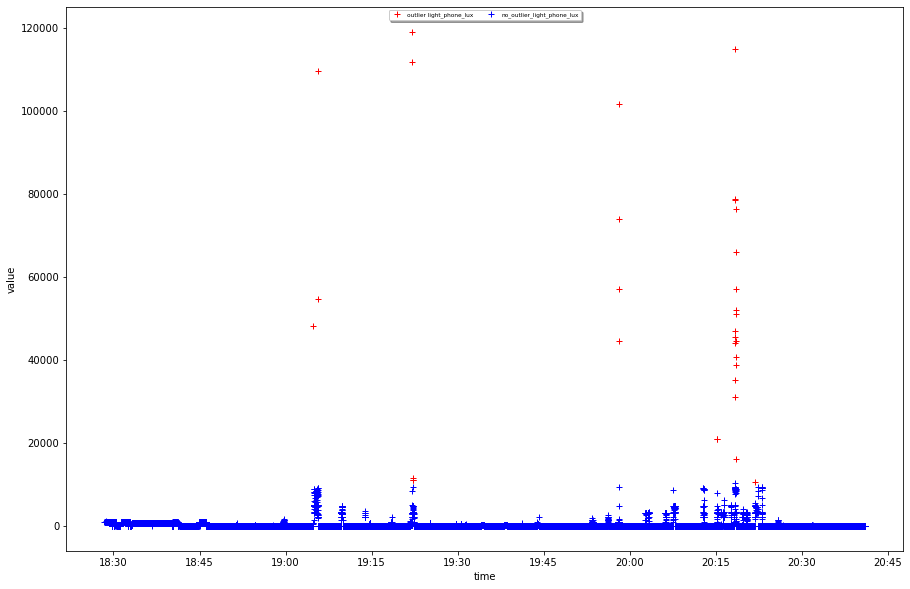

10
Figure saved to figures/figure_11.png


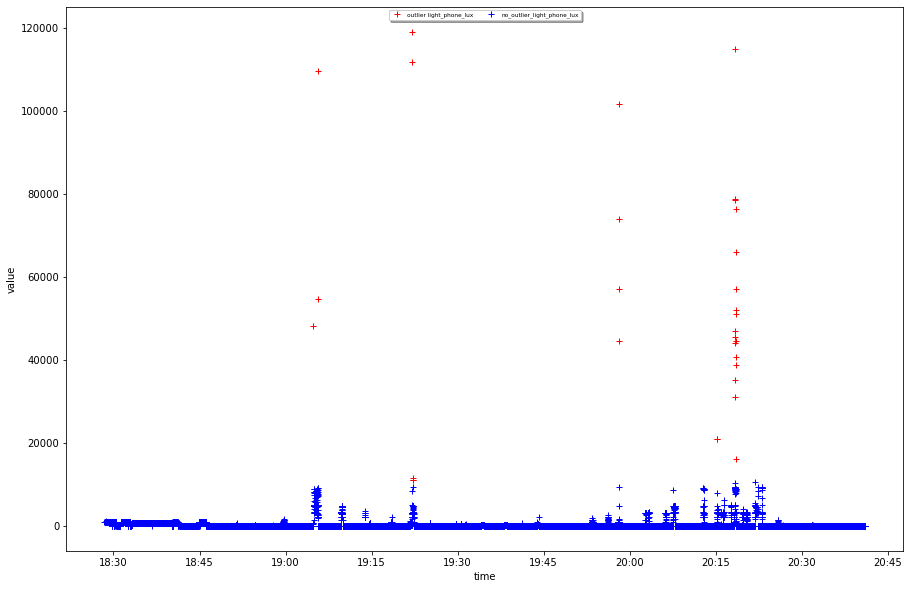

100
Figure saved to figures/figure_12.png


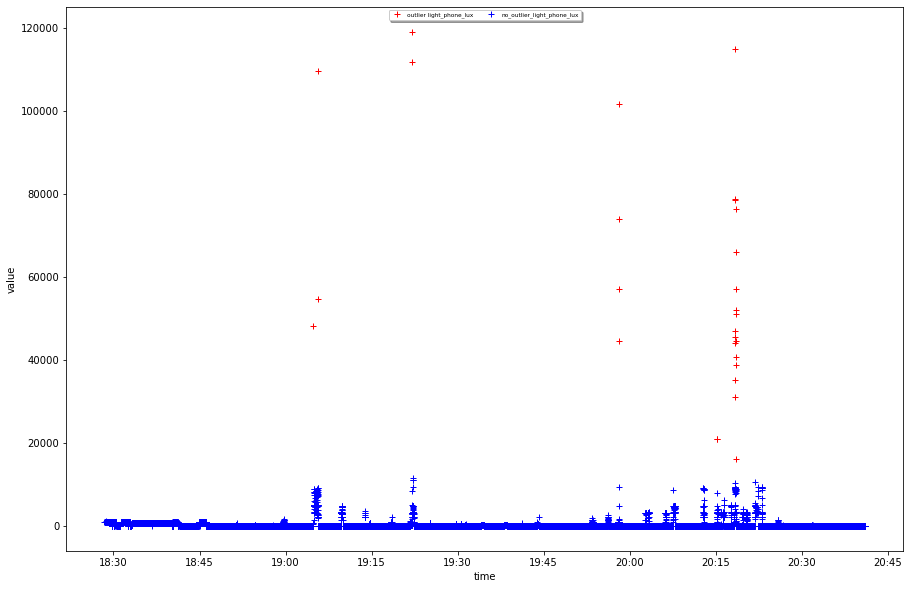

In [6]:
for col in outliercols:
    for c in [2, 10, 100, 1000, 10000]:
        print(c)
        datasetch = OutlierDistr.chauvenet(dataset, col, c)
        DataViz.plot_binary_outliers(datasetch, col, col+"_outlier")

## Mixture

3 100
Applying mixture models
Figure saved to figures/figure_13.png


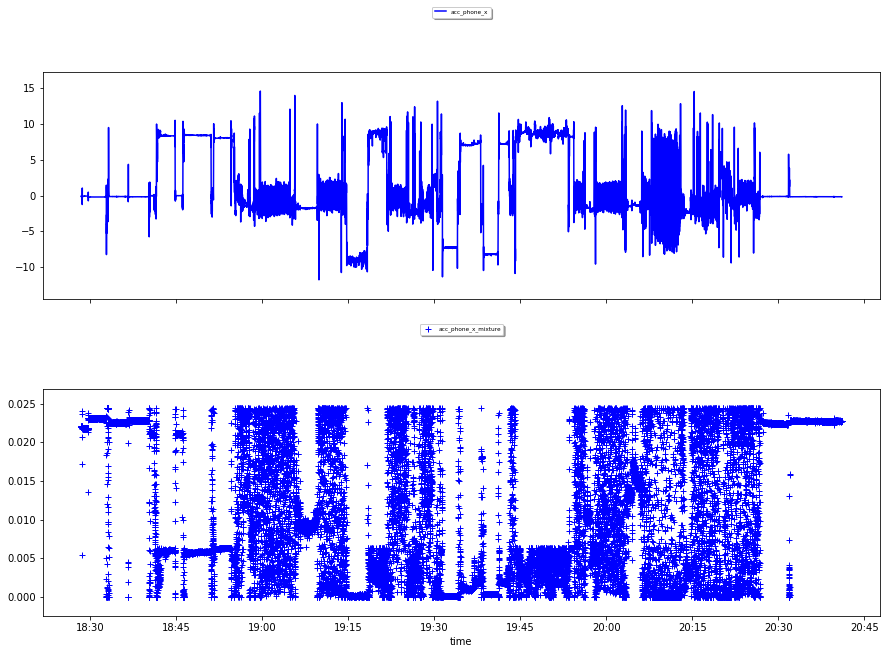

6 200
Applying mixture models
Figure saved to figures/figure_14.png


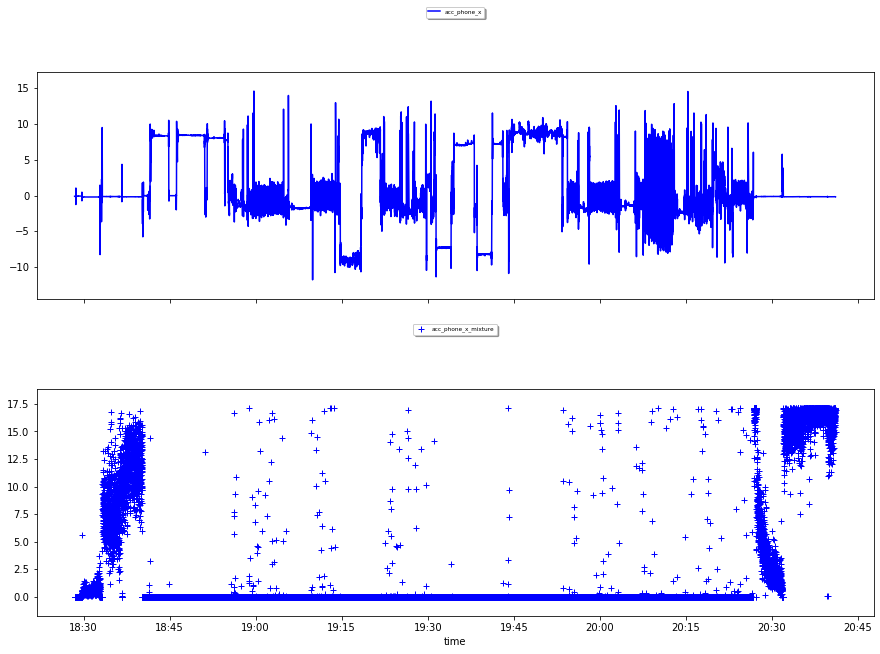

9 300
Applying mixture models
Figure saved to figures/figure_15.png


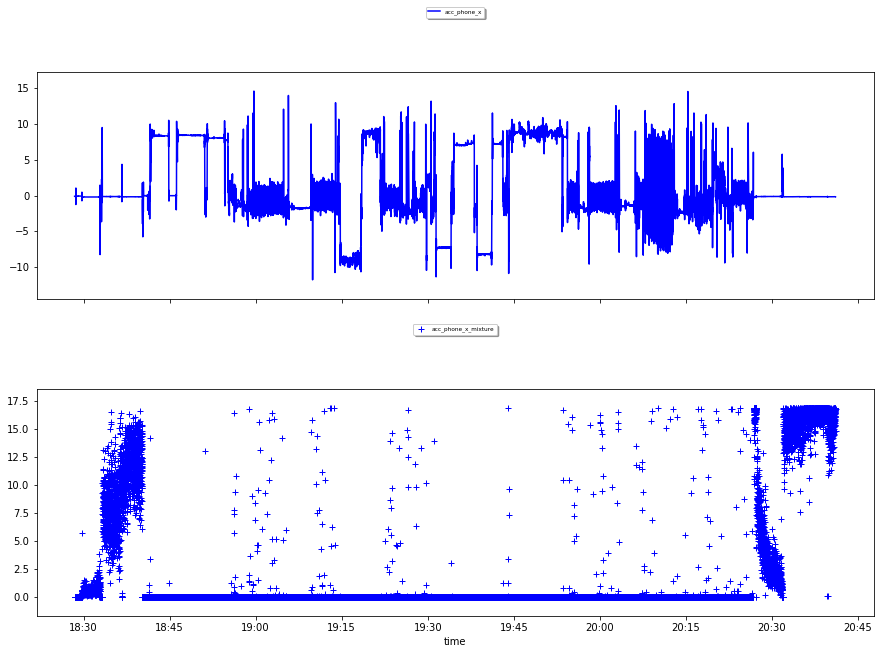

3 100
Applying mixture models
Figure saved to figures/figure_16.png


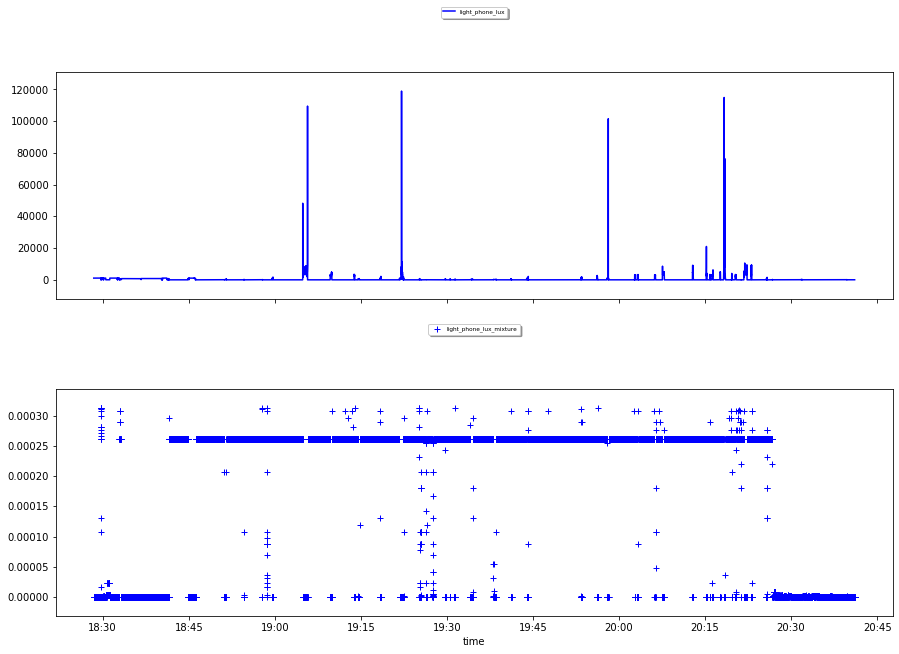

6 200
Applying mixture models
Figure saved to figures/figure_17.png


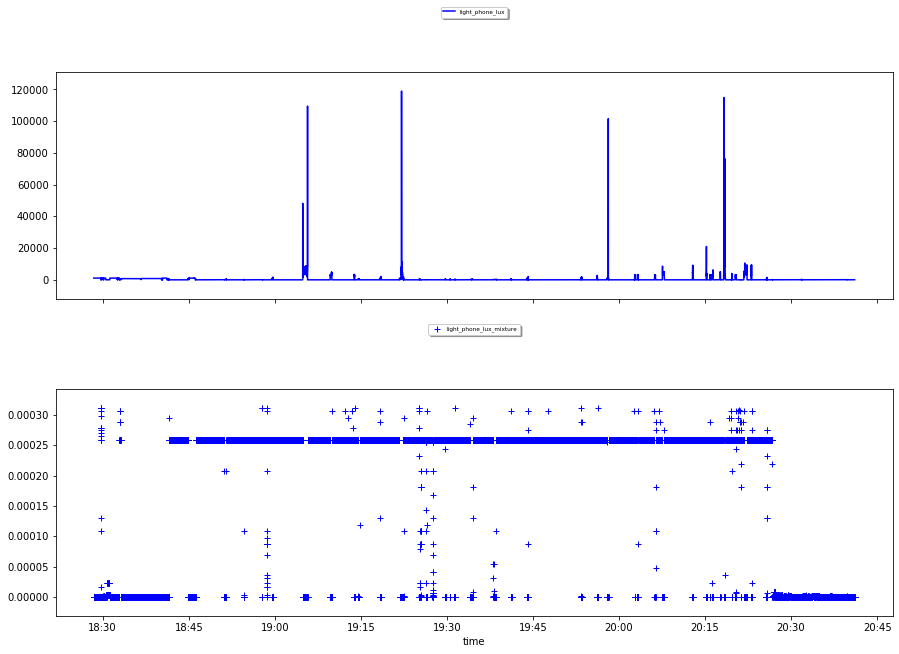

9 300
Applying mixture models
Figure saved to figures/figure_18.png


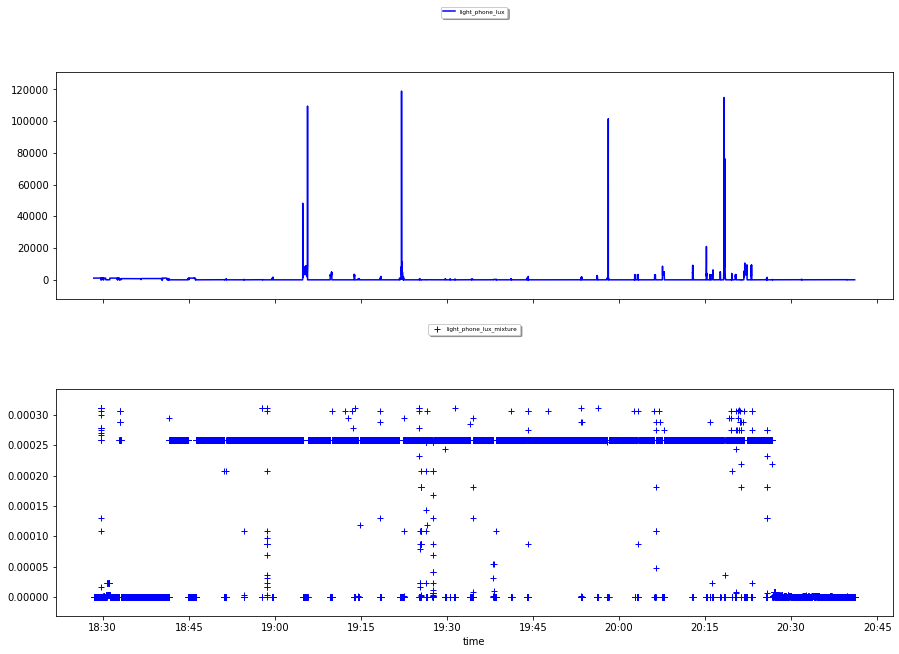

In [7]:
for col in outliercols:
    for comps, iters in [[3, 100], [6,200], [9, 300]]:
        print(comps, iters)
        datasetmix = OutlierDistr.mixture_model(dataset, col, comps, iters)
        DataViz.plot_dataset(datasetmix, [col, col+"_mixture"], ["exact", "exact"], ["line", "points"])

## Simple Distance

0.1 0.99
Calculating simple distance-based criterion.
Figure saved to figures\figure_19.png


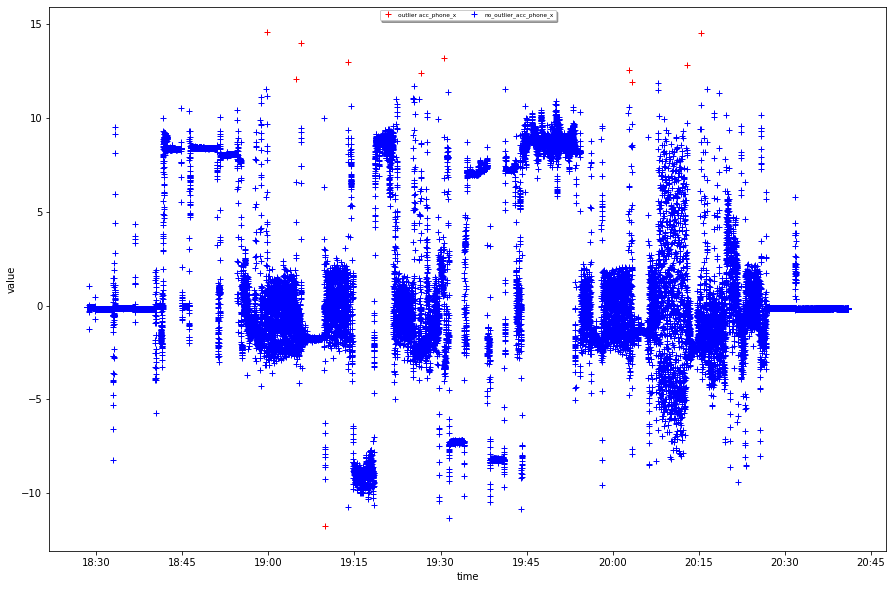

0.12 0.98
Calculating simple distance-based criterion.
Figure saved to figures\figure_20.png


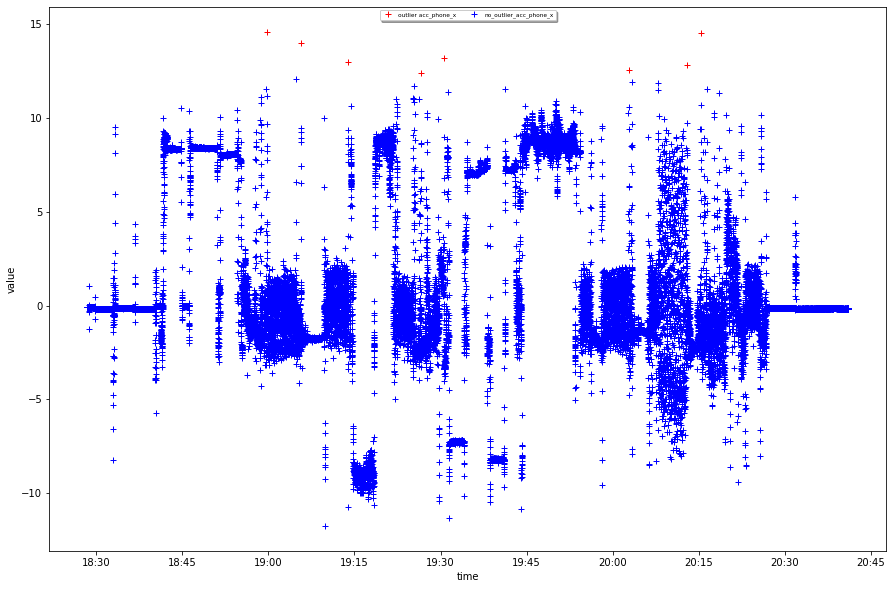

0.15 0.95
Calculating simple distance-based criterion.
Figure saved to figures\figure_21.png


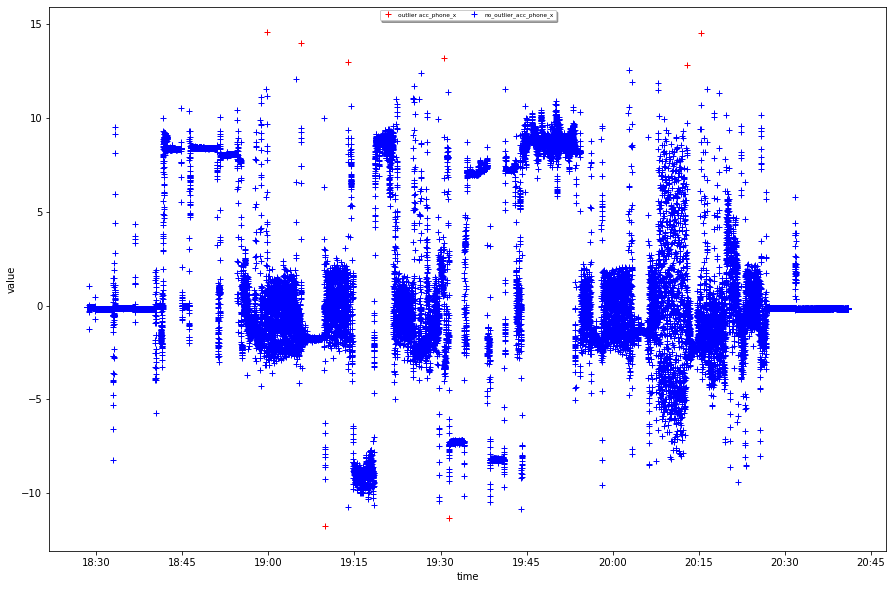

0.1 0.99
Calculating simple distance-based criterion.
Figure saved to figures\figure_22.png


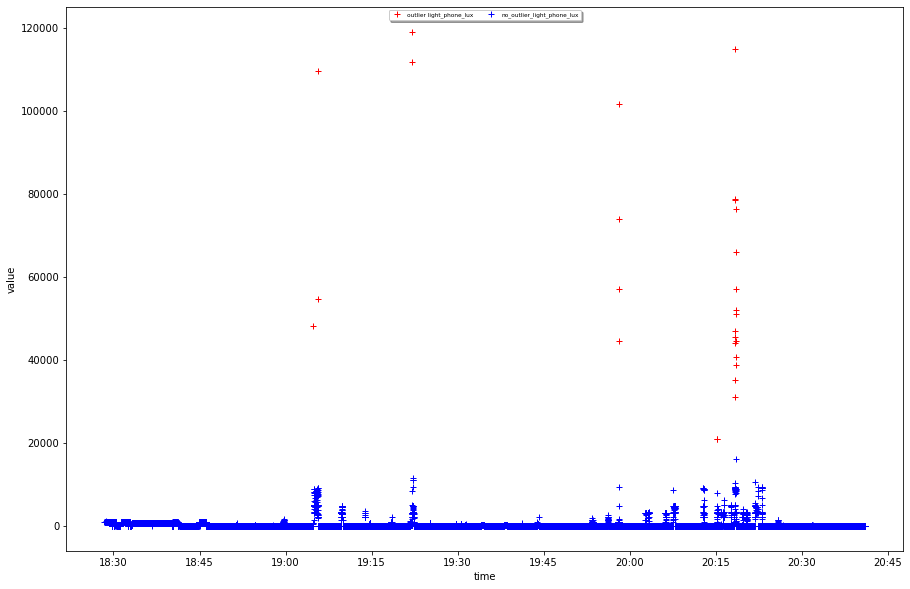

0.12 0.98
Calculating simple distance-based criterion.
Figure saved to figures\figure_23.png


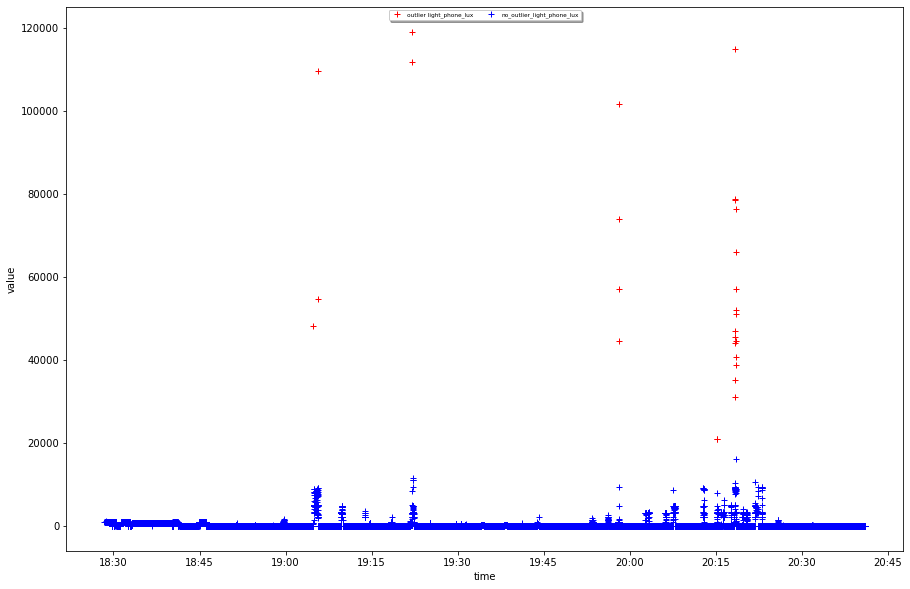

0.15 0.95
Calculating simple distance-based criterion.
Figure saved to figures\figure_24.png


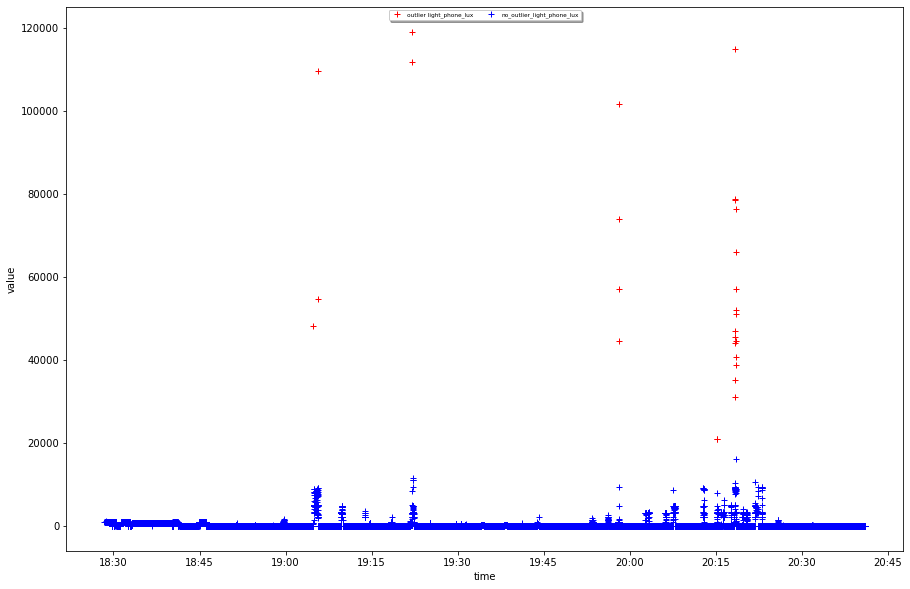

In [8]:
dmin = 0.10
fmin = 0.99
for col in outliercols:
    for dmin, fmin in [[0.10, 0.99], [0.12, 0.98], [0.15, 0.95]]:
        print(dmin, fmin)
        datasetdis = OutlierDist.simple_distance_based(dataset, [col], "euclidean", dmin, fmin)
        DataViz.plot_binary_outliers(datasetdis, col, 'simple_dist_outlier')

## Local Outlier Factor

5
Calculating local outlier factor.
Figure saved to figures/figure_1.png


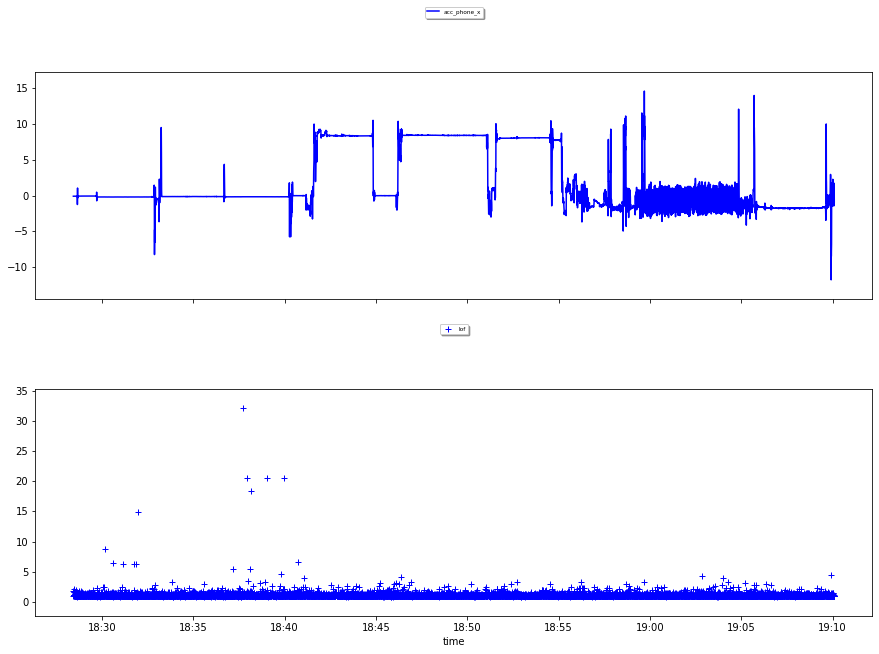

10
Calculating local outlier factor.
Figure saved to figures/figure_2.png


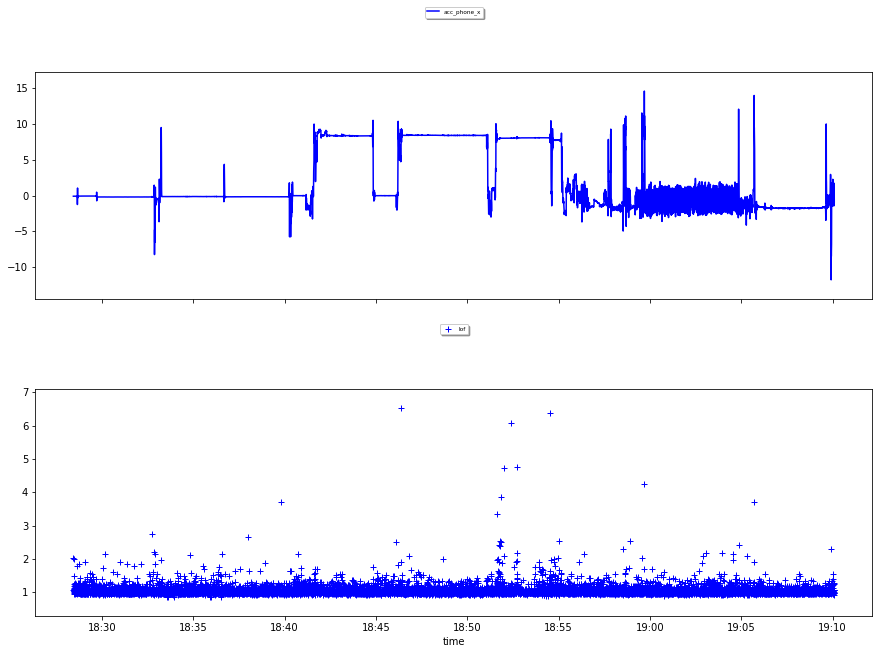

15
Calculating local outlier factor.
Figure saved to figures/figure_3.png


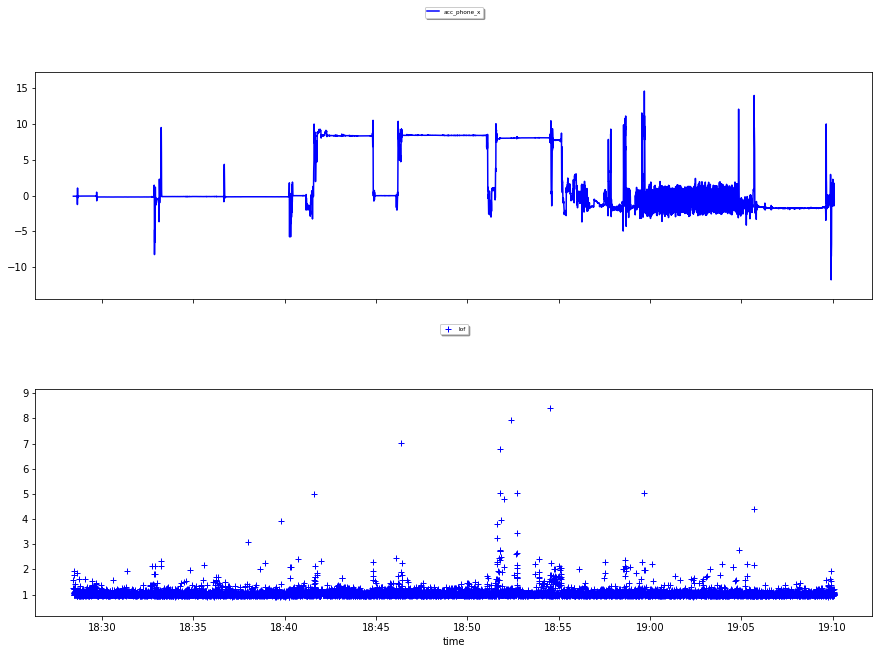

5
Calculating local outlier factor.
Figure saved to figures/figure_4.png


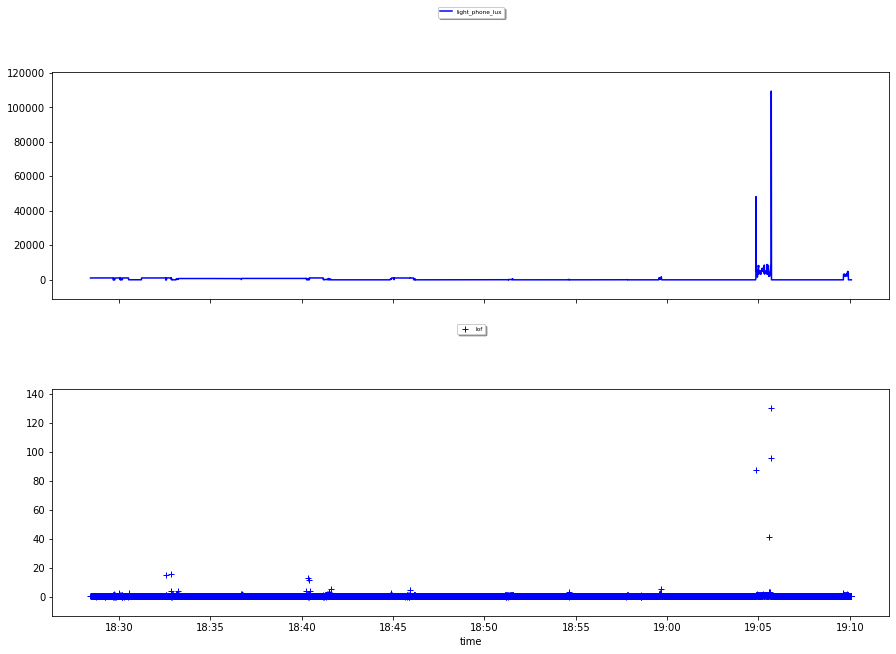

10
Calculating local outlier factor.
Figure saved to figures/figure_5.png


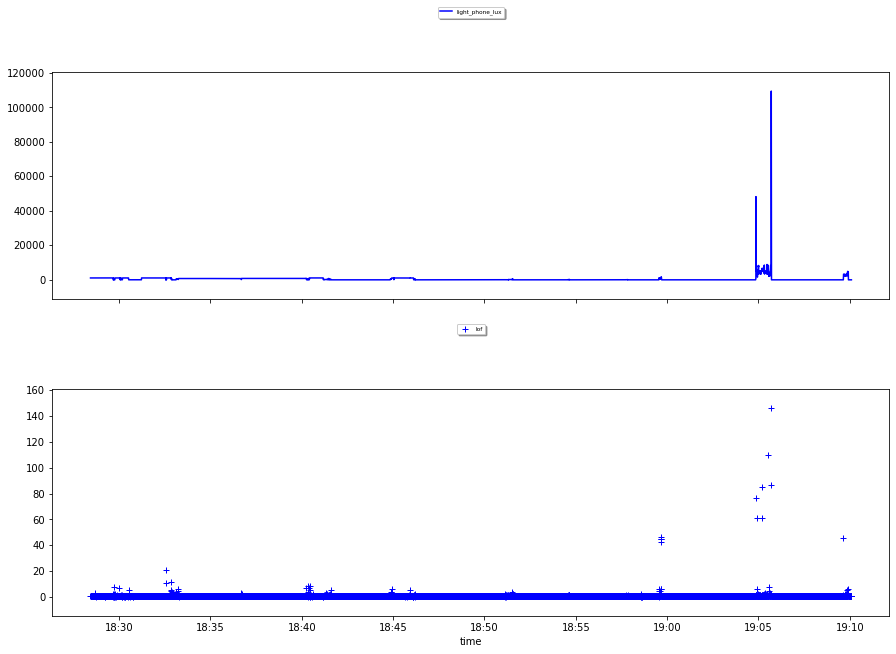

15
Calculating local outlier factor.
Figure saved to figures/figure_6.png


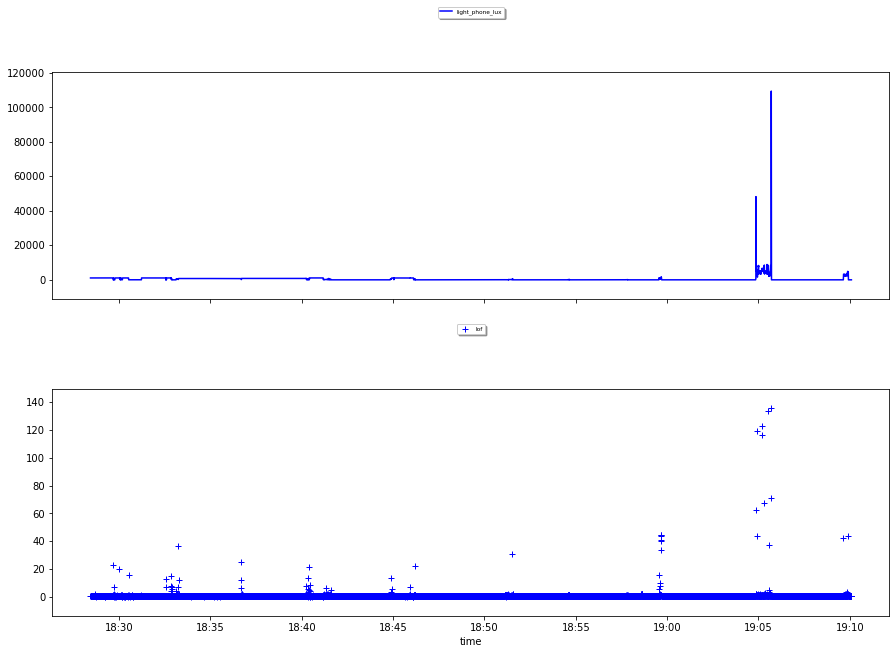

In [16]:
for col in outliercols:
    for K in [5, 10, 15]:
        print(K)
        datasetlof = OutlierDist.local_outlier_factor(copy.deepcopy(dataset), [col], "euclidean", K)
        DataViz.plot_dataset(datasetlof, [col, "lof"], ["exact", "exact"], ["line", "points"])